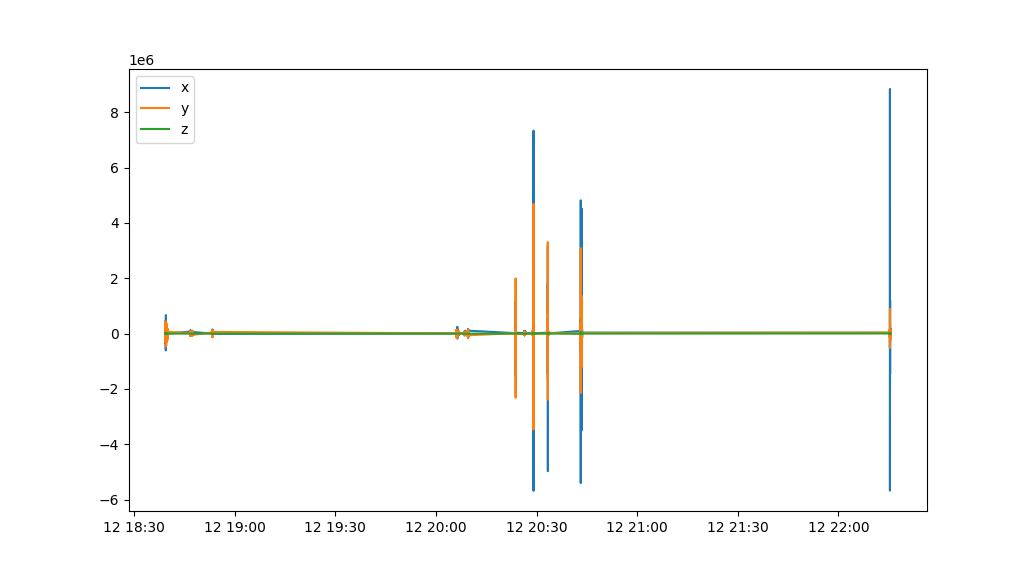

In [40]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

timestamps = []
timestamps_us = []
x = []
y = []
z = []

for line in open("seismodata.txt"):    
    columns = line.strip().split(",")
    if len(columns) != 9:
        continue

    
    timestamps.append(datetime.fromtimestamp(int(columns[0]) / 1e6))
    # timestamps.append(int(columns[0]))
    timestamps_us.append(int(columns[1]))
    x.append(int(columns[2]))
    y.append(int(columns[3]))
    z.append(int(columns[4]))
    
def zero(data):
    avg = np.mean(data)
    print(f"Min: {min(data)}, Avg: {avg}, Max: {max(data)} -> Delta {max(data) - min(data)}")
    return [v - avg for v in data]

def _plot_rms(data, window_size, label):
    rms_values = [np.sqrt(np.mean([v*v for v in data[i:i+window_size]])) for i in range(len(data) - window_size)] 
    plt.plot(rms_values, label=label)
    plt.plot([abs(rms_values[i] - rms_values[i-1]) for i in range(1, len(rms_values))], "x-", label=label + " delta")
    return 

def plot_rms():
    _plot_rms(x, 1000, "x")	
    _plot_rms(y, 1000, "y")	
    _plot_rms(z, 1000, "z")	

def plot_xyz():
    plt.plot(timestamps, x, label="x")
    plt.plot(timestamps, y, label="y")
    plt.plot(timestamps, z, label="z")
    #plt.plot(rms(x, 10), label="rms 10")
    #plt.plot(rms(x, 100), label="rms 100")
    #plt.plot(rms(y, 100), label="yrms 100")
    #plt.plot(rms(z, 100), label="zrms 50")

plt.clf()
plot_xyz()
#plot_xyz()
plt.legend()
plt.show()

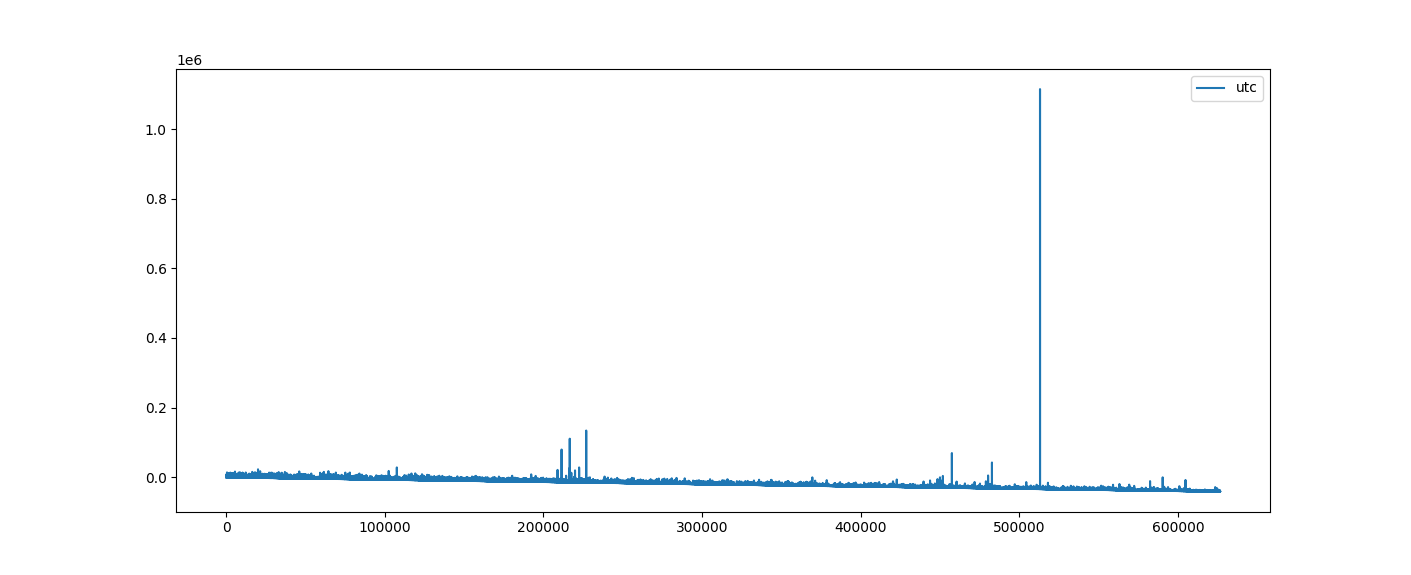

In [70]:
%matplotlib widget
import matplotlib.pyplot as plt

timestamps_utc = []
timestamps_us = []
prev_timestamp_us = 0
real_timestamp_us = 0

for line in open("timestamps.txt"):
    columns = line.strip().split(",")
    if len(columns) != 2:
        continue
    
    timestamps_utc.append(int(columns[0]))

    ts_us = int(columns[1])
    delta = ts_us - prev_timestamp_us
    if delta < 0:
        delta += 0xFFFFFFFF + 1
        
    real_timestamp_us += delta
    prev_timestamp_us = ts_us

    timestamps_us.append(real_timestamp_us)

plt.clf()
#plt.plot([timestamps_utc[i] - timestamps_utc[i-1] for i in range(1, len(timestamps_utc))], label="utc")
#plt.plot([timestamps_us[i] - timestamps_us[i-1] for i in range(1, len(timestamps_us))], label="us")
deltas = [timestamps_utc[i] - timestamps_us[i] for i in range(len(timestamps_utc))]
plt.plot([deltas[i] - deltas[0] for i in range(len(deltas))], label="utc")
#plt.plot([timestamps_us[i] - timestamps_us[0] for i in range(1, len(timestamps_us))], label="us")
plt.legend()
plt.show()


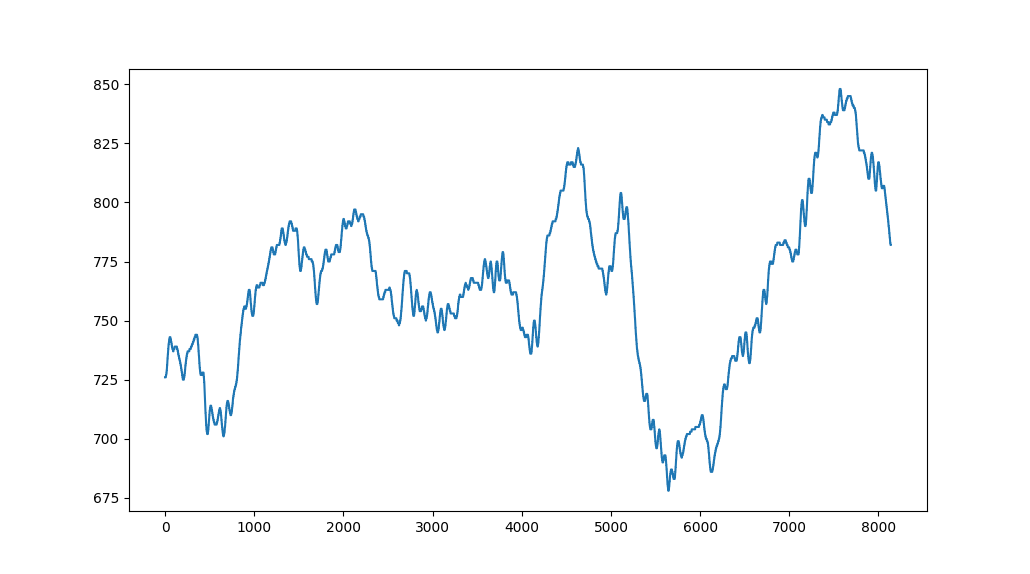

In [39]:
%matplotlib widget
import matplotlib.pyplot as plt

rms_values = []
for line in open("seismo-rms.txt"):
    rms_values.append(int(line))

plt.clf()
plt.plot(rms_values)
plt.show()